# Self Organized Maps (SOMs)

## Import Libraries

In [1]:
# MiniSOM
from minisom import MiniSom

# XPySOM
from xpysom import XPySom

# SimpSOM, https://simpsom.readthedocs.io
import simpsom as sps
# from simpsom.plots import scatter_on_map

# Math and others
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table

ModuleNotFoundError: No module named 'minisom'

## Import catalog

In [2]:
emu_matched_catalog = '/data/mfonseca/cross_match/EMU_0102-32/EMU_0101-32_DES_VIKING_CATWISE/EMU_0102-32_DES_VIKING_CATWISE.fits'

In [12]:
catalog_table = Table.read(emu_matched_catalog, format='fits')
catalog_df = catalog_table.to_pandas()

# Filter the catalog based on the match_flag and p_i, p_any values
match_mask = (catalog_df['match_flag'] == 1) & (catalog_df['p_i'] >= 0.1) & (catalog_df['p_any'] >=0.84)

catalog_df_filtered_matches = catalog_df[match_mask]

# Filter the catalog to keep only the magnitude
magnitude_columns = ['DES_mag_auto_g_dered', 'DES_mag_auto_r_dered', 'DES_mag_auto_i_dered', 'DES_mag_auto_z_dered',
                       'VKG_zPetroMag', 'VKG_jPetroMag', 'VKG_yPetroMag', 'VKG_ksPetroMag', 'VKG_hPetroMag', 'CAT_w1mpro', 'CAT_w2mpro']
catalog_df_filtered_matches_magnitude = catalog_df_filtered_matches[magnitude_columns]

print(len(catalog_df_filtered_matches_magnitude))

12563


In [13]:
catalog_matrix = catalog_df_filtered_matches_magnitude.to_numpy()

## SimpSOM

In [79]:
help(sps.SOMNet)

Help on class SOMNet in module simpsom.network:

class SOMNet(builtins.object)
 |  SOMNet(net_height, net_width, data, load_file=None, metric='euclidean', metric_kwds={}, init='PCA', PBC=False, GPU=False, random_seed=None)
 |  
 |  Kohonen SOM Network class.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, net_height, net_width, data, load_file=None, metric='euclidean', metric_kwds={}, init='PCA', PBC=False, GPU=False, random_seed=None)
 |      Initialise the SOM network.
 |      
 |      Args:
 |          net_height (int): Number of nodes along the first dimension.
 |          net_width (int): Numer of nodes along the second dimension.
 |          data (self.interface.num.array or list): N-dimensional dataset.
 |          load_file (str, optional): Name of file to load containing information 
 |              to initialize the network weights.
 |          metric (string): distance metric for the identification of best matching
 |              units. Accepts metrics available in s

### Example

In [3]:
from pylettes import *
pylette = Tundra(reverse=True).cmap

from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

flat_data = train_X.reshape(train_X.shape[0], -1)

ModuleNotFoundError: No module named 'pylettes'

In [91]:
net = sps.SOMNet(10, 10, data, init='PCA', metric='cosine', PBC=True, random_seed=32, GPU=False)

Periodic Boundary Conditions active.
The weights will be initialized with PCA.


In [92]:
net.train(train_algo='batch', start_learning_rate=10, epochs=-1, batch_size=-1)

The map will be trained with the batch algorithm.
Training SOM... 0% 

KeyboardInterrupt: 

### XPySom

In [ ]:
data_min = catalog_matrix.min(axis=0)
data_max = catalog_matrix.max(axis=0)
normalized_data = (catalog_matrix - data_min) / (data_max - data_min)

In [ ]:
galaxy_names = catalog_df['EMU_island_name'].values

# data normalization
data = (catalog_df_filtered - np.mean(catalog_df_filtered, axis=0)) / np.std(catalog_df_filtered, axis=0)
data = data.values

# Initialization and training
som_shape = (20, 20)
som = XPySom(20, 20, data)


TypeError: only integer scalar arrays can be converted to a scalar index

## MiniSom

### Example

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5], 
                   sep='\t+', engine='python')
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values


# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

[[ 1.42097769e-01 -9.86151745e-01]
 [ 1.11880257e-02 -1.78816620e+00]
 [-1.92066576e-01 -6.67479334e-01]
 [-3.47091272e-01 -9.60817955e-01]
 [ 4.45257175e-01 -1.56349549e+00]
 [-1.61061637e-01 -8.25482182e-01]
 [-5.42668460e-02 -7.61353407e-02]
 [-2.54076455e-01 -6.66812655e-01]
 [ 6.14061844e-01 -1.10682059e+00]
 [ 5.48606973e-01 -1.15415477e+00]
 [ 1.42097769e-01  5.61876160e-01]
 [-2.81636401e-01 -1.32215780e+00]
 [-3.29866306e-01  1.90536133e-01]
 [-3.67761232e-01 -3.76140749e-01]
 [-3.81541205e-01 -5.12143200e-01]
 [-8.87167785e-02  3.23205191e-01]
 [-2.95416374e-01  1.02255113e+00]
 [ 2.90232479e-01 -1.40082589e+00]
 [-5.08218528e-02 -1.28882387e+00]
 [-7.32930516e-01  2.67870860e-01]
 [-2.36851488e-01 -4.18808184e-01]
 [-2.54076455e-01 -6.74812799e-01]
 [ 3.55687351e-01 -1.95676924e+00]
 [-9.53410084e-01 -1.52349476e+00]
 [ 5.59729379e-02 -1.27282358e+00]
 [ 4.62482141e-01 -1.86483425e+00]
 [-6.29580719e-01 -2.18137900e-01]
 [-7.26040530e-01 -7.97481677e-01]
 [-2.54076455e-01 -6

In [15]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

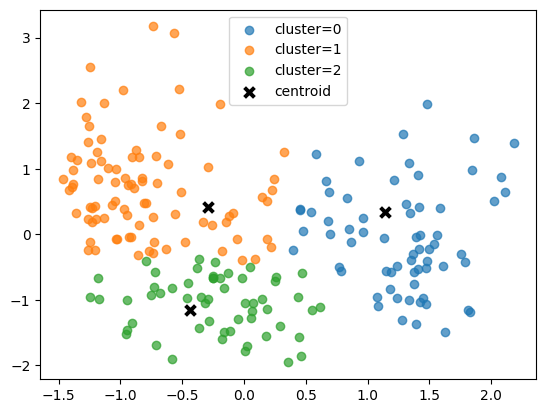

In [ ]:
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=4, linewidths=10, color='k', label='centroid')
plt.legend(loc='best')

### With our galaxy values

In [19]:
galaxy_names = catalog_df['EMU_island_name'].str.decode('utf-8').str.strip()

# Normalize the data
data = (catalog_df_filtered_matches_magnitude - np.mean(catalog_df_filtered_matches_magnitude, axis=0)) / np.std(catalog_df_filtered_matches_magnitude, axis=0)
data = data.values

In [50]:
som_shape = (10, 10)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.1,
              neighborhood_function='gaussian', random_seed=0)

som.train_batch(data, 100000, verbose=True)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.20844634964872283


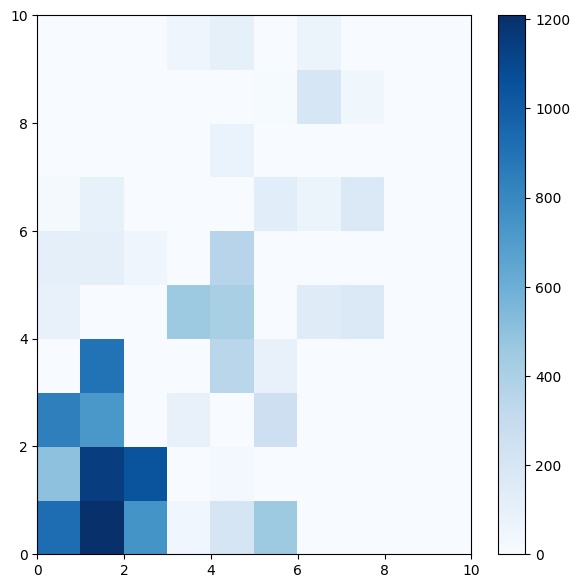

In [51]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

In [52]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

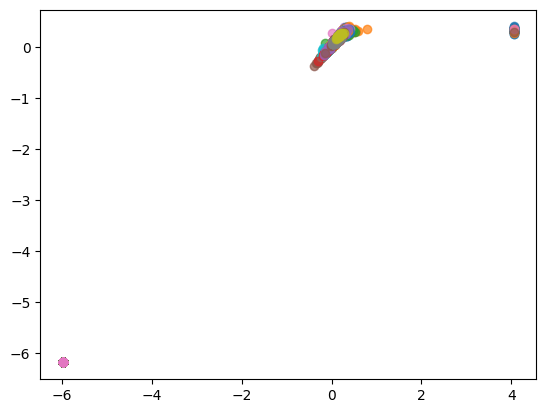

In [54]:
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plt.xlim(-.5,1)
# plt.ylim(-1,1)
